In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./results/times.csv')

def shortenName(benchString):
    return benchString.replace('de.tu_darmstadt.stg.daimpl.causality.benchmarks.ForkEventJoinSendReceiveBenchmark.' , '')

def fixFloatWithCommas(floatAsString):
    if isinstance(floatAsString, str):
        return float(floatAsString.replace(',','.'))
    else:
        return floatAsString

df['Score'] = df['Score'].map(fixFloatWithCommas)
df['Score Error (99,9%)'] = df['Score Error (99,9%)'].map(fixFloatWithCommas)
df['Benchmark'] = df['Benchmark'].map(shortenName)
df.drop(columns=['Threads', 'Samples'], inplace=True)
df

,Benchmark,Mode,Score,"Score Error (99,9%)",Unit,Param: generationParams,Param: programLength
0,testIntervalTreeClock,avgt,0.063804,0.000851,s/op,"1,25,25,25,25",10000
1,testIntervalTreeClock,avgt,0.120033,0.001586,s/op,"1,25,25,25,25",20000
2,testIntervalTreeClock,avgt,1.151248,0.035914,s/op,"1,25,25,25,25",40000
3,testIntervalTreeClock,avgt,11.537679,0.474028,s/op,"1,25,25,25,25",80000
4,testIntervalTreeClock,avgt,0.011316,0.001403,s/op,"1,70,5,5,20",10000
...,...,...,...,...,...,...,...
59,testVectorClockWithSerialization,avgt,0.112172,0.079438,s/op,"10,60,0,0,40",80000
60,testVectorClockWithSerialization,avgt,0.153982,0.008604,s/op,"100,60,0,0,40",10000
61,testVectorClockWithSerialization,avgt,0.323120,0.453441,s/op,"100,60,0,0,40",20000
62,testVectorClockWithSerialization,avgt,0.748721,2.536318,s/op,"100,60,0,0,40",40000


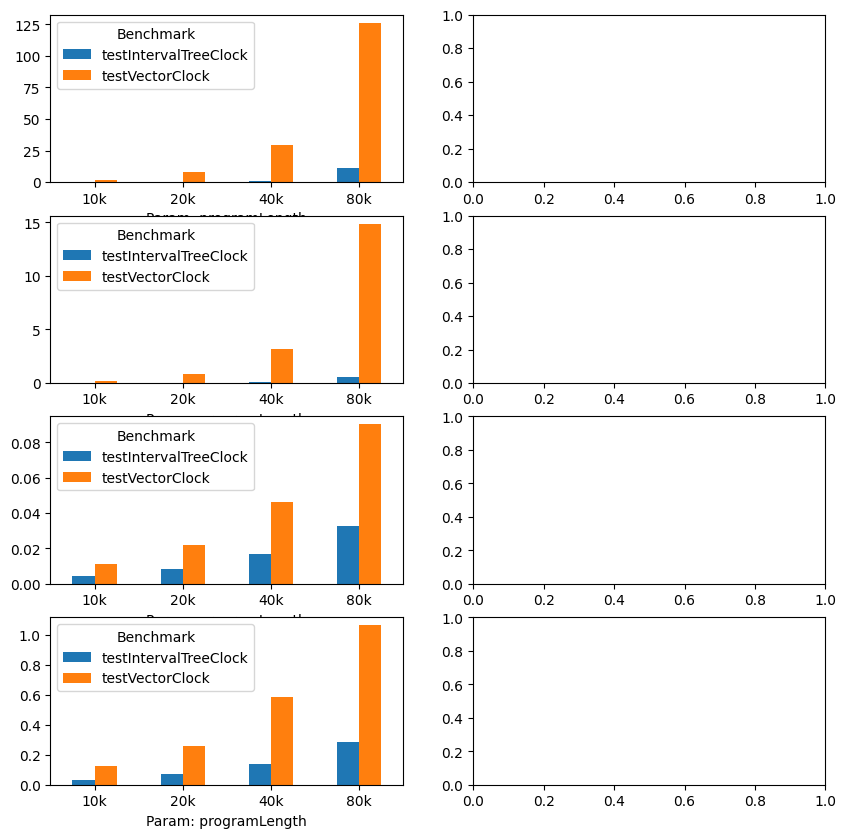

In [10]:
fig, axs = plt.subplots(4,2, figsize=(10,10))
for ((ax_left, ax_right), param) in zip(axs, ['1,25,25,25,25', '1,70,5,5,20', '10,60,0,0,40', '100,60,0,0,40']):
    curDf = df[(df['Param: generationParams'] == param) & (df['Benchmark'].isin(['testIntervalTreeClock', 'testVectorClock']))].pivot(index='Param: programLength', columns='Benchmark', values='Score')
    curDf.plot.bar(ax=ax_left)
    ax_left.set_xticklabels(curDf.index.map(lambda x: f"{int(x/1000)}k"), rotation=0)